In [2]:
import os
import cupy as cp
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def summarize_diagnostics(history):
    # plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')

# E0

In [76]:
folder = 'prova_E/prova_E/E0/'
i = 0
for file in os.listdir(folder):
    if file.startswith('el'):
        i+=1
print(i)

90265


In [79]:
E0 = np.empty((139137, 20, 1), dtype=cp.float64)
labels_E0 = np.zeros(139137)
folder = 'prova_E/prova_E/E0/'
i = 0
for file in os.listdir(folder):
    if file.startswith('el'):
        labels_E0[i] = 1
    array = np.load(folder + file)
    array = cp.reshape(array, (20,1))
    E0[i] = array
    i += 1

In [80]:
E0 = E0/E0.max()

In [81]:
from sklearn.model_selection import train_test_split
E0X_train, E0X_test, E0Y_train, E0Y_test = train_test_split(E0 , labels_E0 ,test_size=0.2)

In [31]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D, BatchNormalization

model0 = Sequential()
model0.add(Conv1D(32, 3, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(20, 1)))
model0.add(MaxPooling1D(2))
model0.add(BatchNormalization())
model0.add(Dropout(0.2))
model0.add(Conv1D(64, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model0.add(MaxPooling1D(2))
model0.add(BatchNormalization())
model0.add(Dropout(0.2))
model0.add(Conv1D(128, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model0.add(MaxPooling1D(2))
model0.add(BatchNormalization())
model0.add(Dropout(0.2))
model0.add(Flatten())
model0.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model0.add(BatchNormalization())
model0.add(Dropout(0.5))
model0.add(Dense(1, activation='sigmoid'))

In [32]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
model0.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [33]:
history0 = model0.fit(E0X_train, E0Y_train, batch_size=64, validation_data=(E0X_test, E0Y_test), epochs=20)

Train on 111309 samples, validate on 27828 samples
Epoch 1/20
111309/111309 [==============================] - 19s 169us/step - loss: 0.7444 - accuracy: 0.6070 - val_loss: 0.5591 - val_accuracy: 0.6518
Epoch 2/20
111309/111309 [==============================] - 18s 160us/step - loss: 0.6091 - accuracy: 0.6526 - val_loss: 0.5400 - val_accuracy: 0.6749
Epoch 3/20
111309/111309 [==============================] - 18s 162us/step - loss: 0.5674 - accuracy: 0.6711 - val_loss: 0.5184 - val_accuracy: 0.7014
Epoch 4/20
111309/111309 [==============================] - 18s 165us/step - loss: 0.5432 - accuracy: 0.6896 - val_loss: 0.5105 - val_accuracy: 0.7123
Epoch 5/20
111309/111309 [==============================] - 16s 147us/step - loss: 0.5301 - accuracy: 0.7012 - val_loss: 0.5089 - val_accuracy: 0.7117
Epoch 6/20
111309/111309 [==============================] - 16s 145us/step - loss: 0.5200 - accuracy: 0.7098 - val_loss: 0.5026 - val_accuracy: 0.7228
Epoch 7/20
111309/111309 [=================

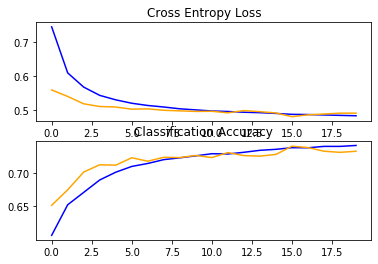

In [34]:
summarize_diagnostics(history0)

In [74]:
model2 = Sequential()
#model1.add(Input(shape=(21,1)))
model2.add(Flatten(input_shape=(20,1)))
model2.add(BatchNormalization())
model2.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dense(1, activation='sigmoid'))

In [77]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
model2.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [82]:
history2 = model2.fit(E0X_train, E0Y_train, batch_size=64, validation_data=(E0X_test, E0Y_test), epochs=20)

Train on 111309 samples, validate on 27828 samples
Epoch 1/20
111309/111309 [==============================] - 4s 33us/step - loss: 0.5854 - accuracy: 0.6651 - val_loss: 0.5509 - val_accuracy: 0.6809
Epoch 2/20
111309/111309 [==============================] - 3s 29us/step - loss: 0.5410 - accuracy: 0.6955 - val_loss: 0.5282 - val_accuracy: 0.7042
Epoch 3/20
111309/111309 [==============================] - 3s 24us/step - loss: 0.5251 - accuracy: 0.7133 - val_loss: 0.5139 - val_accuracy: 0.7196
Epoch 4/20
111309/111309 [==============================] - 4s 36us/step - loss: 0.5135 - accuracy: 0.7248 - val_loss: 0.5037 - val_accuracy: 0.7291
Epoch 5/20
111309/111309 [==============================] - 3s 26us/step - loss: 0.5061 - accuracy: 0.7312 - val_loss: 0.4965 - val_accuracy: 0.7352
Epoch 6/20
111309/111309 [==============================] - 4s 35us/step - loss: 0.5008 - accuracy: 0.7356 - val_loss: 0.4921 - val_accuracy: 0.7389
Epoch 7/20
111309/111309 [=============================

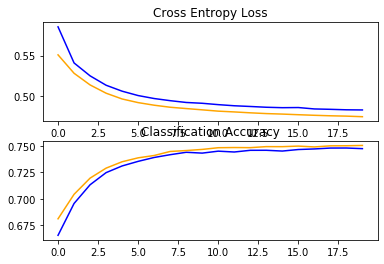

In [83]:
summarize_diagnostics(history2)

# E1

In [86]:
folder = 'prova_E/prova_E/E1/'
i = 0
for file in os.listdir(folder):
    if file.startswith('el'):
        i += 1
print(i)

89735


In [90]:
E1 = np.empty((189571, 20, 1), dtype=cp.float64)
labels_E1 = np.zeros(189571)
folder = 'prova_E/prova_E/E1/'
i = 0
for file in os.listdir(folder):
    if file.startswith('el'):
        labels_E1[i] = 1
    array = np.load(folder + file)
    array = cp.reshape(array, (20,1))
    E1[i] = array
    i += 1

In [91]:
E1 = E1/E1.max()

In [92]:
E1X_train, E1X_test, E1Y_train, E1Y_test = train_test_split(E1 , labels_E1 ,test_size=0.2)

In [93]:
model1 = Sequential()
model1.add(Conv1D(32, 20, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(20, 1)))
model1.add(MaxPooling1D(2))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))
model1.add(Conv1D(64, 20, activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(MaxPooling1D(2))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))
model1.add(Conv1D(128, 20, activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(MaxPooling1D(2))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))
model1.add(Flatten())
model1.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model1.add(Dropout(0.5))
model1.add(Dense(1, activation='sigmoid'))

In [94]:
model1.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [95]:
history1 = model1.fit(E1X_train, E1Y_train, batch_size=64, validation_data=(E1X_test, E1Y_test), epochs=20)

Train on 151656 samples, validate on 37915 samples
Epoch 1/20
151656/151656 [==============================] - 30s 200us/step - loss: 0.7087 - accuracy: 0.5613 - val_loss: 0.6587 - val_accuracy: 0.6062
Epoch 2/20
151656/151656 [==============================] - 30s 198us/step - loss: 0.6560 - accuracy: 0.6048 - val_loss: 0.6304 - val_accuracy: 0.6515
Epoch 3/20
151656/151656 [==============================] - 29s 191us/step - loss: 0.6403 - accuracy: 0.6291 - val_loss: 0.6202 - val_accuracy: 0.6568
Epoch 4/20
151656/151656 [==============================] - 29s 189us/step - loss: 0.6334 - accuracy: 0.6389 - val_loss: 0.6131 - val_accuracy: 0.6623
Epoch 5/20
151656/151656 [==============================] - 29s 189us/step - loss: 0.6283 - accuracy: 0.6450 - val_loss: 0.6077 - val_accuracy: 0.6668
Epoch 6/20
151656/151656 [==============================] - 29s 189us/step - loss: 0.6246 - accuracy: 0.6510 - val_loss: 0.6084 - val_accuracy: 0.6656
Epoch 7/20
151656/151656 [=================

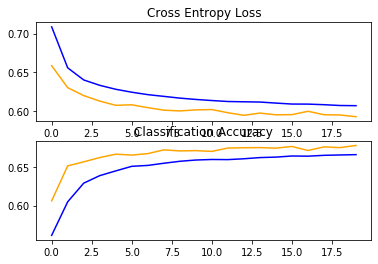

In [96]:
summarize_diagnostics(history1)

In [97]:
model2 = Sequential()
#model1.add(Input(shape=(21,1)))
model2.add(Flatten(input_shape=(20,1)))
model2.add(BatchNormalization())
model2.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dense(1, activation='sigmoid'))

In [98]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
model2.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [99]:
history2 = model2.fit(E1X_train, E1Y_train, batch_size=64, validation_data=(E1X_test, E1Y_test), epochs=20)

Train on 151656 samples, validate on 37915 samples
Epoch 1/20
151656/151656 [==============================] - 6s 41us/step - loss: 0.6753 - accuracy: 0.5796 - val_loss: 0.6540 - val_accuracy: 0.6072
Epoch 2/20
151656/151656 [==============================] - 6s 41us/step - loss: 0.6492 - accuracy: 0.6127 - val_loss: 0.6414 - val_accuracy: 0.6246
Epoch 3/20
151656/151656 [==============================] - 6s 41us/step - loss: 0.6407 - accuracy: 0.6238 - val_loss: 0.6349 - val_accuracy: 0.6343
Epoch 4/20
151656/151656 [==============================] - 6s 41us/step - loss: 0.6355 - accuracy: 0.6313 - val_loss: 0.6304 - val_accuracy: 0.6409
Epoch 5/20
151656/151656 [==============================] - 6s 42us/step - loss: 0.6319 - accuracy: 0.6374 - val_loss: 0.6268 - val_accuracy: 0.6455
Epoch 6/20
151656/151656 [==============================] - 6s 40us/step - loss: 0.6299 - accuracy: 0.6398 - val_loss: 0.6252 - val_accuracy: 0.6495
Epoch 7/20
151656/151656 [=============================

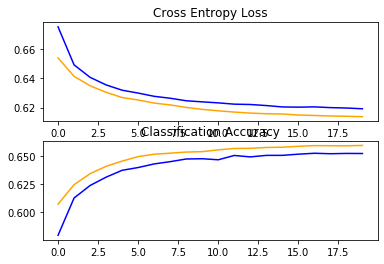

In [100]:
summarize_diagnostics(history2)

# E2

In [32]:
folder = 'prova_E/prova_E/E2/'
i = 0
for file in os.listdir(folder):
    i += 1
print(i)

190128


In [33]:
E2 = np.empty((190128, 20, 1), dtype=cp.float64)
labels_E2 = np.zeros(190128)
folder = 'prova_E/prova_E/E2/'
i = 0
for file in os.listdir(folder):
    if file.startswith('el'):
        labels_E2[i] = 1
    array = np.load(folder + file)
    array = cp.reshape(array, (20,1))
    E2[i] = array
    i += 1

In [34]:
E2 = E2/E2.max()

In [35]:
E2X_train, E2X_test, E2Y_train, E2Y_test = train_test_split(E2 , labels_E2 ,test_size=0.2)

In [36]:
model2 = Sequential()
model2.add(Conv1D(32, 3, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(20, 1)))
model2.add(MaxPooling1D(2))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(Conv1D(64, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(MaxPooling1D(2))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(Conv1D(128, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(MaxPooling1D(2))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(Flatten())
model2.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))

In [37]:
model2.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [38]:
history2 = model2.fit(E2X_train, E2Y_train, batch_size=64, validation_data=(E2X_test, E2Y_test), epochs=20)

Train on 152102 samples, validate on 38026 samples
Epoch 1/20
152102/152102 [==============================] - 18s 117us/step - loss: 0.6924 - accuracy: 0.5250 - val_loss: 0.6907 - val_accuracy: 0.5285
Epoch 2/20
152102/152102 [==============================] - 18s 116us/step - loss: 0.6886 - accuracy: 0.5388 - val_loss: 0.6864 - val_accuracy: 0.5286
Epoch 3/20
152102/152102 [==============================] - 18s 116us/step - loss: 0.6845 - accuracy: 0.5524 - val_loss: 0.6900 - val_accuracy: 0.5320
Epoch 4/20
152102/152102 [==============================] - 17s 115us/step - loss: 0.6816 - accuracy: 0.5578 - val_loss: 0.6870 - val_accuracy: 0.5388
Epoch 5/20
152102/152102 [==============================] - 17s 115us/step - loss: 0.6799 - accuracy: 0.5611 - val_loss: 0.6816 - val_accuracy: 0.5481
Epoch 6/20
152102/152102 [==============================] - 17s 114us/step - loss: 0.6776 - accuracy: 0.5664 - val_loss: 0.6840 - val_accuracy: 0.5486
Epoch 7/20
152102/152102 [=================

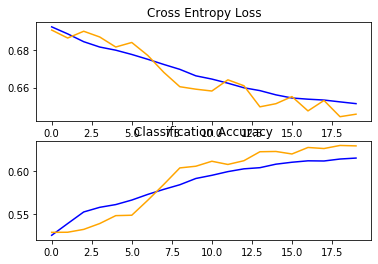

In [39]:
summarize_diagnostics(history2)

# E3

In [40]:
folder = 'prova_E/prova_E/E3/'
i = 0
for file in os.listdir(folder):
    i += 1
print(i)

190432


In [41]:
E3 = np.empty((190432, 20, 1), dtype=cp.float64)
labels_E3 = np.zeros(190432)
folder = 'prova_E/prova_E/E3/'
i = 0
for file in os.listdir(folder):
    if file.startswith('el'):
        labels_E3[i] = 1
    array = np.load(folder + file)
    array = cp.reshape(array, (20,1))
    E3[i] = array
    i += 1

In [42]:
E3 = E3/E3.max()

In [43]:
E3X_train, E3X_test, E3Y_train, E3Y_test = train_test_split(E3 , labels_E3 ,test_size=0.2)

In [44]:
model3 = Sequential()
model3.add(Conv1D(32, 3, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(20, 1)))
model3.add(MaxPooling1D(2))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))
model3.add(Conv1D(64, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(MaxPooling1D(2))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))
model3.add(Conv1D(128, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(MaxPooling1D(2))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))
model3.add(Flatten())
model3.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model3.add(Dropout(0.5))
model3.add(Dense(1, activation='sigmoid'))

In [45]:
model3.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [46]:
history3 = model3.fit(E3X_train, E3Y_train, batch_size=64, validation_data=(E3X_test, E3Y_test), epochs=20)

Train on 152345 samples, validate on 38087 samples
Epoch 1/20
152345/152345 [==============================] - 18s 116us/step - loss: 0.6929 - accuracy: 0.5219 - val_loss: 0.6915 - val_accuracy: 0.5297
Epoch 2/20
152345/152345 [==============================] - 17s 113us/step - loss: 0.6915 - accuracy: 0.5277 - val_loss: 0.6903 - val_accuracy: 0.5296
Epoch 3/20
152345/152345 [==============================] - 17s 113us/step - loss: 0.6895 - accuracy: 0.5346 - val_loss: 0.6887 - val_accuracy: 0.5296
Epoch 4/20
152345/152345 [==============================] - 17s 113us/step - loss: 0.6868 - accuracy: 0.5443 - val_loss: 0.6939 - val_accuracy: 0.5302
Epoch 5/20
152345/152345 [==============================] - 17s 114us/step - loss: 0.6847 - accuracy: 0.5504 - val_loss: 0.6852 - val_accuracy: 0.5365
Epoch 6/20
152345/152345 [==============================] - 17s 114us/step - loss: 0.6826 - accuracy: 0.5566 - val_loss: 0.6891 - val_accuracy: 0.5350
Epoch 7/20
152345/152345 [=================

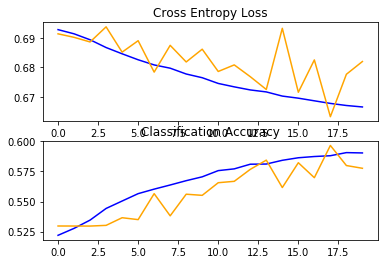

In [54]:
summarize_diagnostics(history3)

# E4

In [47]:
folder = 'prova_E/prova_E/E4/'
i = 0
for file in os.listdir(folder):
    i += 1
print(i)

188824


In [48]:
E4 = np.empty((188824, 20, 1), dtype=cp.float64)
labels_E4 = np.zeros(188824)
folder = 'prova_E/prova_E/E4/'
i = 0
for file in os.listdir(folder):
    if file.startswith('el'):
        labels_E4[i] = 1
    array = np.load(folder + file)
    array = cp.reshape(array, (20,1))
    E4[i] = array
    i += 1

In [49]:
E4 = E4/E4.max()

In [50]:
E4X_train, E4X_test, E4Y_train, E4Y_test = train_test_split(E4 , labels_E4 ,test_size=0.2)

In [51]:
model4 = Sequential()
model4.add(Conv1D(32, 3, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(20, 1)))
model4.add(MaxPooling1D(2))
model4.add(BatchNormalization())
model4.add(Dropout(0.2))
model4.add(Conv1D(64, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(MaxPooling1D(2))
model4.add(BatchNormalization())
model4.add(Dropout(0.2))
model4.add(Conv1D(128, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(MaxPooling1D(2))
model4.add(BatchNormalization())
model4.add(Dropout(0.2))
model4.add(Flatten())
model4.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model4.add(Dropout(0.5))
model4.add(Dense(1, activation='sigmoid'))

In [52]:
model4.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [53]:
history4 = model4.fit(E4X_train, E4Y_train, batch_size=64, validation_data=(E4X_test, E4Y_test), epochs=20)

Train on 151059 samples, validate on 37765 samples
Epoch 1/20
151059/151059 [==============================] - 18s 117us/step - loss: 0.6939 - accuracy: 0.5147 - val_loss: 0.6923 - val_accuracy: 0.5221
Epoch 2/20
151059/151059 [==============================] - 17s 114us/step - loss: 0.6923 - accuracy: 0.5223 - val_loss: 0.6920 - val_accuracy: 0.5221
Epoch 3/20
151059/151059 [==============================] - 17s 110us/step - loss: 0.6920 - accuracy: 0.5232 - val_loss: 0.6921 - val_accuracy: 0.5221
Epoch 4/20
151059/151059 [==============================] - 16s 106us/step - loss: 0.6914 - accuracy: 0.5264 - val_loss: 0.6914 - val_accuracy: 0.5221
Epoch 5/20
151059/151059 [==============================] - 17s 115us/step - loss: 0.6907 - accuracy: 0.5284 - val_loss: 0.6902 - val_accuracy: 0.5222
Epoch 6/20
151059/151059 [==============================] - 17s 115us/step - loss: 0.6898 - accuracy: 0.5326 - val_loss: 0.6911 - val_accuracy: 0.5223
Epoch 7/20
151059/151059 [=================

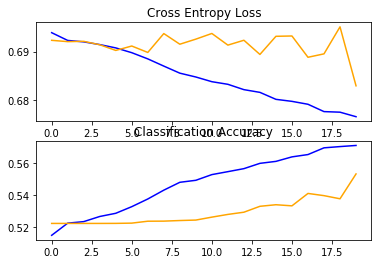

In [55]:
summarize_diagnostics(history4)

# E5

In [56]:
folder = 'prova_E/prova_E/E5/'
i = 0
for file in os.listdir(folder):
    i += 1
print(i)

169695


In [57]:
E5 = np.empty((169695, 20, 1), dtype=cp.float64)
labels_E5 = np.zeros(169695)
folder = 'prova_E/prova_E/E5/'
i = 0
for file in os.listdir(folder):
    if file.startswith('el'):
        labels_E5[i] = 1
    array = np.load(folder + file)
    array = cp.reshape(array, (20,1))
    E5[i] = array
    i += 1

In [58]:
E5 = E5/E5.max()

In [59]:
E5X_train, E5X_test, E5Y_train, E5Y_test = train_test_split(E5 , labels_E5 ,test_size=0.2)

In [60]:
model5 = Sequential()
model5.add(Conv1D(32, 3, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(20, 1)))
model5.add(MaxPooling1D(2))
model5.add(BatchNormalization())
model5.add(Dropout(0.2))
model5.add(Conv1D(64, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(MaxPooling1D(2))
model5.add(BatchNormalization())
model5.add(Dropout(0.2))
model5.add(Conv1D(128, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(MaxPooling1D(2))
model5.add(BatchNormalization())
model5.add(Dropout(0.2))
model5.add(Flatten())
model5.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model5.add(Dropout(0.5))
model5.add(Dense(1, activation='sigmoid'))

In [61]:
model5.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [62]:
history5 = model5.fit(E5X_train, E5Y_train, batch_size=64, validation_data=(E5X_test, E5Y_test), epochs=20)

Train on 135756 samples, validate on 33939 samples
Epoch 1/20
135756/135756 [==============================] - 16s 117us/step - loss: 0.6942 - accuracy: 0.5180 - val_loss: 0.6919 - val_accuracy: 0.5259
Epoch 2/20
135756/135756 [==============================] - 15s 110us/step - loss: 0.6923 - accuracy: 0.5240 - val_loss: 0.6918 - val_accuracy: 0.5260
Epoch 3/20
135756/135756 [==============================] - 15s 113us/step - loss: 0.6918 - accuracy: 0.5265 - val_loss: 0.6916 - val_accuracy: 0.5260
Epoch 4/20
135756/135756 [==============================] - 15s 107us/step - loss: 0.6917 - accuracy: 0.5251 - val_loss: 0.6915 - val_accuracy: 0.5260
Epoch 5/20
135756/135756 [==============================] - 15s 114us/step - loss: 0.6914 - accuracy: 0.5263 - val_loss: 0.6912 - val_accuracy: 0.5260
Epoch 6/20
135756/135756 [==============================] - 15s 111us/step - loss: 0.6909 - accuracy: 0.5272 - val_loss: 0.6911 - val_accuracy: 0.5260
Epoch 7/20
135756/135756 [=================

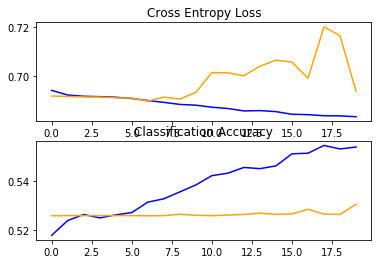

In [63]:
summarize_diagnostics(history5)

# E6

In [64]:
folder = 'prova_E/prova_E/E6/'
i = 0
for file in os.listdir(folder):
    i += 1
print(i)

149425


In [65]:
E6 = np.empty((149425, 20, 1), dtype=cp.float64)
labels_E6 = np.zeros(149425)
folder = 'prova_E/prova_E/E6/'
i = 0
for file in os.listdir(folder):
    if file.startswith('el'):
        labels_E6[i] = 1
    array = np.load(folder + file)
    array = cp.reshape(array, (20,1))
    E6[i] = array
    i += 1

In [66]:
E6 = E6/E6.max()

In [67]:
E6X_train, E6X_test, E6Y_train, E6Y_test = train_test_split(E6 , labels_E6 ,test_size=0.2)

In [68]:
model6 = Sequential()
model6.add(Conv1D(32, 3, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(20, 1)))
model6.add(MaxPooling1D(2))
model6.add(BatchNormalization())
model6.add(Dropout(0.2))
model6.add(Conv1D(64, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model6.add(MaxPooling1D(2))
model6.add(BatchNormalization())
model6.add(Dropout(0.2))
model6.add(Conv1D(128, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model6.add(MaxPooling1D(2))
model6.add(BatchNormalization())
model6.add(Dropout(0.2))
model6.add(Flatten())
model6.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model6.add(Dropout(0.5))
model6.add(Dense(1, activation='sigmoid'))

In [69]:
model6.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [70]:
history6 = model6.fit(E6X_train, E6Y_train, batch_size=64, validation_data=(E6X_test, E6Y_test), epochs=20)

Train on 119540 samples, validate on 29885 samples
Epoch 1/20
119540/119540 [==============================] - 14s 118us/step - loss: 0.6768 - accuracy: 0.5984 - val_loss: 0.6764 - val_accuracy: 0.6001
Epoch 2/20
119540/119540 [==============================] - 14s 114us/step - loss: 0.6752 - accuracy: 0.5996 - val_loss: 0.6757 - val_accuracy: 0.6001
Epoch 3/20
119540/119540 [==============================] - 14s 117us/step - loss: 0.6748 - accuracy: 0.5996 - val_loss: 0.6753 - val_accuracy: 0.6001
Epoch 4/20
119540/119540 [==============================] - 13s 106us/step - loss: 0.6744 - accuracy: 0.5996 - val_loss: 0.6739 - val_accuracy: 0.6001
Epoch 5/20
119540/119540 [==============================] - 13s 109us/step - loss: 0.6740 - accuracy: 0.5996 - val_loss: 0.6730 - val_accuracy: 0.6001
Epoch 6/20
119540/119540 [==============================] - 14s 117us/step - loss: 0.6737 - accuracy: 0.5996 - val_loss: 0.6727 - val_accuracy: 0.6001
Epoch 7/20
119540/119540 [=================

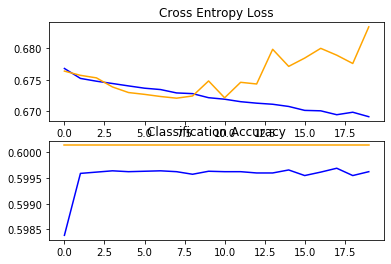

In [71]:
summarize_diagnostics(history6)

# E7

In [72]:
folder = 'prova_E/prova_E/E7/'
i = 0
for file in os.listdir(folder):
    i += 1
print(i)

141085


In [73]:
E7 = np.empty((141085, 20, 1), dtype=cp.float64)
labels_E7 = np.zeros(141085)
folder = 'prova_E/prova_E/E7/'
i = 0
for file in os.listdir(folder):
    if file.startswith('el'):
        labels_E7[i] = 1
    array = np.load(folder + file)
    array = cp.reshape(array, (20,1))
    E7[i] = array
    i += 1

In [74]:
E7 = E7/E7.max()

In [75]:
E7X_train, E7X_test, E7Y_train, E7Y_test = train_test_split(E7 , labels_E7 ,test_size=0.2)

In [76]:
model7 = Sequential()
model7.add(Conv1D(32, 3, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(20, 1)))
model7.add(MaxPooling1D(2))
model7.add(BatchNormalization())
model7.add(Dropout(0.2))
model7.add(Conv1D(64, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model7.add(MaxPooling1D(2))
model7.add(BatchNormalization())
model7.add(Dropout(0.2))
model7.add(Conv1D(128, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model7.add(MaxPooling1D(2))
model7.add(Dropout(0.2))
model7.add(BatchNormalization())
model7.add(Flatten())
model7.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model7.add(Dropout(0.5))
model7.add(Dense(1, activation='sigmoid'))

In [77]:
model7.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [78]:
history7 = model7.fit(E7X_train, E7Y_train, batch_size=64, validation_data=(E7X_test, E7Y_test), epochs=20)

Train on 112868 samples, validate on 28217 samples
Epoch 1/20
112868/112868 [==============================] - 14s 122us/step - loss: 0.6598 - accuracy: 0.6359 - val_loss: 0.6605 - val_accuracy: 0.6426
Epoch 2/20
112868/112868 [==============================] - 13s 116us/step - loss: 0.6583 - accuracy: 0.6366 - val_loss: 0.6580 - val_accuracy: 0.6426
Epoch 3/20
112868/112868 [==============================] - 13s 117us/step - loss: 0.6575 - accuracy: 0.6366 - val_loss: 0.6555 - val_accuracy: 0.6426
Epoch 4/20
112868/112868 [==============================] - 13s 116us/step - loss: 0.6570 - accuracy: 0.6366 - val_loss: 0.6545 - val_accuracy: 0.6426
Epoch 5/20
112868/112868 [==============================] - 13s 111us/step - loss: 0.6567 - accuracy: 0.6366 - val_loss: 0.6523 - val_accuracy: 0.6426
Epoch 6/20
112868/112868 [==============================] - 13s 118us/step - loss: 0.6562 - accuracy: 0.6366 - val_loss: 0.6522 - val_accuracy: 0.6426
Epoch 7/20
112868/112868 [=================

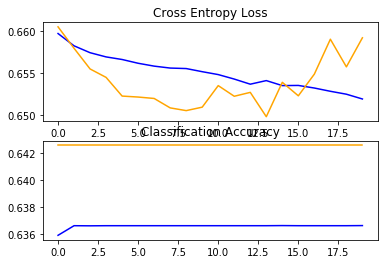

In [79]:
summarize_diagnostics(history7)

# E8

In [69]:
folder = 'prova_E/prova_E/E8/'
i = 0
for file in os.listdir(folder):
    if file.startswith('el'):
        i += 1
print(i)

50254


In [5]:
E8 = np.empty((140086, 20, 1), dtype=cp.float64)
labels_E8 = np.zeros(140086)
folder = 'prova_E/prova_E/E8/'
i = 0
for file in os.listdir(folder):
    if file.startswith('el'):
        labels_E8[i] = 1
    array = np.load(folder + file)
    array = cp.reshape(array, (20,1))
    E8[i] = array
    i += 1

In [16]:
labels_E8[0]

0.0

<BarContainer object of 20 artists>

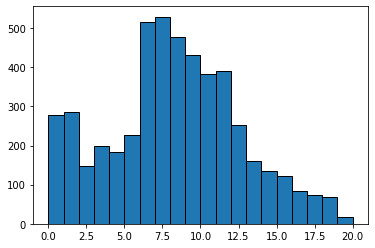

In [22]:
plt.bar(range(20), E8[0].flatten(), width=1, ec='black', align='edge')

<BarContainer object of 20 artists>

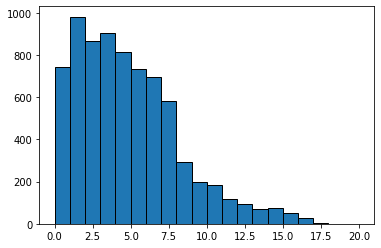

In [23]:
plt.bar(range(20), E8[1].flatten(), width=1, ec='black', align='edge')

<BarContainer object of 20 artists>

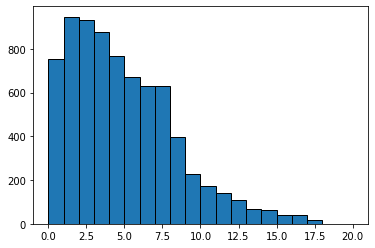

In [24]:
plt.bar(range(20), E8[2].flatten(), width=1, ec='black', align='edge')

In [25]:
a = np.max(E8, axis=0).flatten()

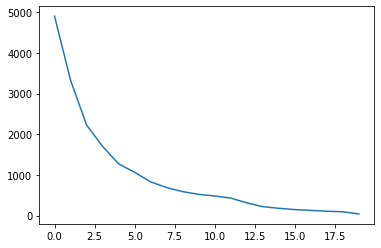

In [26]:
plt.plot(a)

In [6]:
E8 = E8/E8.max()

In [7]:
from sklearn.model_selection import train_test_split
E8X_train, E8X_test, E8Y_train, E8Y_test = train_test_split(E8 , labels_E8 ,test_size=0.2)

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D, BatchNormalization

model8 = Sequential()
model8.add(Conv1D(32, 3, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(20, 1)))
model8.add(MaxPooling1D(2))
model8.add(BatchNormalization())
model8.add(Dropout(0.2))
model8.add(Conv1D(64, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model8.add(MaxPooling1D(2))
model8.add(BatchNormalization())
model8.add(Dropout(0.2))
model8.add(Conv1D(128, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model8.add(MaxPooling1D(2))
model8.add(BatchNormalization())
model8.add(Dropout(0.2))
model8.add(Flatten())
model8.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model8.add(Dropout(0.5))
model8.add(Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [9]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
model8.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [10]:
history8 = model8.fit(E8X_train, E8Y_train, batch_size=64, validation_data=(E8X_test, E8Y_test), epochs=20)

Train on 112068 samples, validate on 28018 samples
Epoch 1/20
112068/112068 [==============================] - 19s 173us/step - loss: 0.7217 - accuracy: 0.6024 - val_loss: 0.6562 - val_accuracy: 0.6436
Epoch 2/20
112068/112068 [==============================] - 17s 149us/step - loss: 0.6603 - accuracy: 0.6365 - val_loss: 0.6518 - val_accuracy: 0.6436
Epoch 3/20
112068/112068 [==============================] - 17s 155us/step - loss: 0.6559 - accuracy: 0.6395 - val_loss: 0.6500 - val_accuracy: 0.6436
Epoch 4/20
112068/112068 [==============================] - 17s 156us/step - loss: 0.6544 - accuracy: 0.6401 - val_loss: 0.6500 - val_accuracy: 0.6436
Epoch 5/20
112068/112068 [==============================] - 18s 157us/step - loss: 0.6536 - accuracy: 0.6405 - val_loss: 0.6488 - val_accuracy: 0.6436
Epoch 6/20
112068/112068 [==============================] - 17s 152us/step - loss: 0.6530 - accuracy: 0.6406 - val_loss: 0.6479 - val_accuracy: 0.6436
Epoch 7/20
112068/112068 [=================

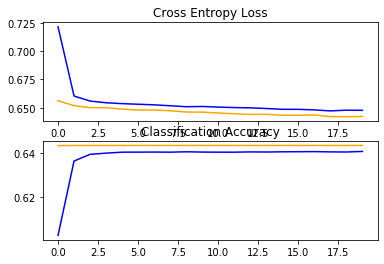

In [15]:
summarize_diagnostics(history8)

# E8 NO DROPOUT

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D, BatchNormalization

model8 = Sequential()
model8.add(Conv1D(32, 3, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(20, 1)))
model8.add(MaxPooling1D(2))
model8.add(BatchNormalization())
model8.add(Conv1D(64, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model8.add(MaxPooling1D(2))
model8.add(BatchNormalization())
model8.add(Conv1D(128, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model8.add(MaxPooling1D(2))
model8.add(BatchNormalization())
model8.add(Flatten())
model8.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model8.add(Dropout(0.5))
model8.add(Dense(1, activation='sigmoid'))

In [11]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
model8.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [12]:
history8 = model8.fit(E8X_train, E8Y_train, batch_size=64, validation_data=(E8X_test, E8Y_test), epochs=20)

Train on 112068 samples, validate on 28018 samples
Epoch 1/20
112068/112068 [==============================] - 18s 165us/step - loss: 0.6735 - accuracy: 0.6247 - val_loss: 0.6409 - val_accuracy: 0.6438
Epoch 2/20
112068/112068 [==============================] - 20s 174us/step - loss: 0.6471 - accuracy: 0.6400 - val_loss: 0.6399 - val_accuracy: 0.6440
Epoch 3/20
112068/112068 [==============================] - 17s 156us/step - loss: 0.6440 - accuracy: 0.6410 - val_loss: 0.6387 - val_accuracy: 0.6454
Epoch 4/20
112068/112068 [==============================] - 19s 171us/step - loss: 0.6425 - accuracy: 0.6419 - val_loss: 0.6361 - val_accuracy: 0.6449
Epoch 5/20
112068/112068 [==============================] - 18s 164us/step - loss: 0.6417 - accuracy: 0.6428 - val_loss: 0.6366 - val_accuracy: 0.6464
Epoch 6/20
112068/112068 [==============================] - 15s 134us/step - loss: 0.6402 - accuracy: 0.6420 - val_loss: 0.6371 - val_accuracy: 0.6446
Epoch 7/20
112068/112068 [=================

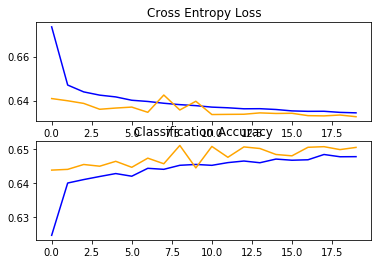

In [13]:
summarize_diagnostics(history8)

# kernel size = 10

In [59]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D, BatchNormalization

model10 = Sequential()
model10.add(Conv1D(32, 10, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(20, 1)))
model10.add(MaxPooling1D(2))
model10.add(BatchNormalization())
model10.add(Conv1D(64, 10, activation='relu', kernel_initializer='he_uniform', padding='same'))
model10.add(MaxPooling1D(2))
model10.add(BatchNormalization())
model10.add(Conv1D(128, 10, activation='relu', kernel_initializer='he_uniform', padding='same'))
model10.add(MaxPooling1D(2))
model10.add(BatchNormalization())
model10.add(Flatten())
model10.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model10.add(Dropout(0.5))
model10.add(Dense(1, activation='sigmoid'))

In [61]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
model10.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [62]:
history10 = model10.fit(E8X_train, E8Y_train, batch_size=64, validation_data=(E8X_test, E8Y_test), epochs=20)

Train on 112068 samples, validate on 28018 samples
Epoch 1/20
112068/112068 [==============================] - 20s 175us/step - loss: 0.6626 - accuracy: 0.6308 - val_loss: 0.6423 - val_accuracy: 0.6439
Epoch 2/20
112068/112068 [==============================] - 19s 170us/step - loss: 0.6483 - accuracy: 0.6400 - val_loss: 0.6406 - val_accuracy: 0.6448
Epoch 3/20
112068/112068 [==============================] - 19s 173us/step - loss: 0.6446 - accuracy: 0.6417 - val_loss: 0.6393 - val_accuracy: 0.6445
Epoch 4/20
112068/112068 [==============================] - 20s 180us/step - loss: 0.6418 - accuracy: 0.6427 - val_loss: 0.6386 - val_accuracy: 0.6467
Epoch 5/20
112068/112068 [==============================] - 20s 179us/step - loss: 0.6409 - accuracy: 0.6439 - val_loss: 0.6372 - val_accuracy: 0.6470
Epoch 6/20
112068/112068 [==============================] - 20s 178us/step - loss: 0.6400 - accuracy: 0.6435 - val_loss: 0.6409 - val_accuracy: 0.6466
Epoch 7/20
112068/112068 [=================

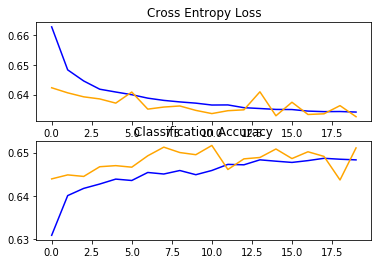

In [63]:
summarize_diagnostics(history10)

# kernel size = 15

In [64]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D, BatchNormalization

model15 = Sequential()
model15.add(Conv1D(32, 15, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(20, 1)))
model15.add(MaxPooling1D(2))
model15.add(BatchNormalization())
model15.add(Conv1D(64, 15, activation='relu', kernel_initializer='he_uniform', padding='same'))
model15.add(MaxPooling1D(2))
model15.add(BatchNormalization())
model15.add(Conv1D(128, 15, activation='relu', kernel_initializer='he_uniform', padding='same'))
model15.add(MaxPooling1D(2))
model15.add(BatchNormalization())
model15.add(Flatten())
model15.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model15.add(Dropout(0.5))
model15.add(Dense(1, activation='sigmoid'))

In [65]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
model15.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [66]:
history15 = model15.fit(E8X_train, E8Y_train, batch_size=64, validation_data=(E8X_test, E8Y_test), epochs=20)

Train on 112068 samples, validate on 28018 samples
Epoch 1/20
112068/112068 [==============================] - 22s 195us/step - loss: 0.6586 - accuracy: 0.6324 - val_loss: 0.6417 - val_accuracy: 0.6436
Epoch 2/20
112068/112068 [==============================] - 22s 200us/step - loss: 0.6449 - accuracy: 0.6405 - val_loss: 0.6374 - val_accuracy: 0.6450
Epoch 3/20
112068/112068 [==============================] - 23s 203us/step - loss: 0.6425 - accuracy: 0.6423 - val_loss: 0.6437 - val_accuracy: 0.6381
Epoch 4/20
112068/112068 [==============================] - 21s 186us/step - loss: 0.6414 - accuracy: 0.6437 - val_loss: 0.6409 - val_accuracy: 0.6439
Epoch 5/20
112068/112068 [==============================] - 21s 188us/step - loss: 0.6402 - accuracy: 0.6450 - val_loss: 0.6356 - val_accuracy: 0.6486
Epoch 6/20
112068/112068 [==============================] - 21s 189us/step - loss: 0.6392 - accuracy: 0.6460 - val_loss: 0.6355 - val_accuracy: 0.6464
Epoch 7/20
112068/112068 [=================

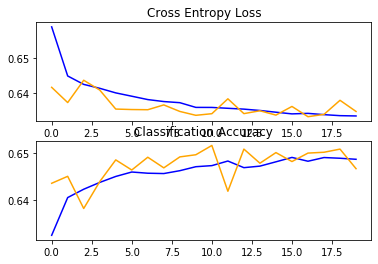

In [67]:
summarize_diagnostics(history15)

# kernel size = 20

In [70]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D, BatchNormalization

model20 = Sequential()
model20.add(Conv1D(32, 20, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(20, 1)))
model20.add(MaxPooling1D(2))
model20.add(BatchNormalization())
model20.add(Conv1D(64, 20, activation='relu', kernel_initializer='he_uniform', padding='same'))
model20.add(MaxPooling1D(2))
model20.add(BatchNormalization())
model20.add(Conv1D(128, 20, activation='relu', kernel_initializer='he_uniform', padding='same'))
model20.add(MaxPooling1D(2))
model20.add(BatchNormalization())
model20.add(Flatten())
model20.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model20.add(Dropout(0.5))
model20.add(Dense(1, activation='sigmoid'))

In [71]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
model20.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [72]:
history20 = model20.fit(E8X_train, E8Y_train, batch_size=64, validation_data=(E8X_test, E8Y_test), epochs=20)

Train on 112068 samples, validate on 28018 samples
Epoch 1/20
112068/112068 [==============================] - 20s 182us/step - loss: 0.6597 - accuracy: 0.6330 - val_loss: 0.6411 - val_accuracy: 0.6458
Epoch 2/20
112068/112068 [==============================] - 19s 173us/step - loss: 0.6448 - accuracy: 0.6419 - val_loss: 0.6378 - val_accuracy: 0.6457
Epoch 3/20
112068/112068 [==============================] - 20s 175us/step - loss: 0.6419 - accuracy: 0.6428 - val_loss: 0.6374 - val_accuracy: 0.6478
Epoch 4/20
112068/112068 [==============================] - 19s 170us/step - loss: 0.6414 - accuracy: 0.6435 - val_loss: 0.6460 - val_accuracy: 0.6455
Epoch 5/20
112068/112068 [==============================] - 19s 170us/step - loss: 0.6394 - accuracy: 0.6445 - val_loss: 0.6441 - val_accuracy: 0.6371
Epoch 6/20
112068/112068 [==============================] - 19s 166us/step - loss: 0.6396 - accuracy: 0.6448 - val_loss: 0.6364 - val_accuracy: 0.6502
Epoch 7/20
112068/112068 [=================

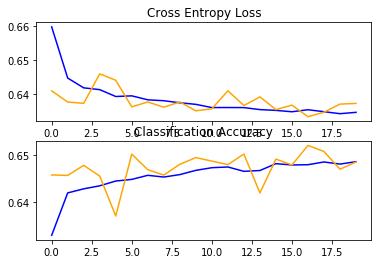

In [73]:
summarize_diagnostics(history20)

# E9

In [48]:
folder = 'prova_E/prova_E/E9/'
i = 0
for file in os.listdir(folder):
    if file.startswith('pos'):
        i += 1
print(i)

90077


In [88]:
folder = 'prova_E/prova_E/E9/'
i = 0
for file in os.listdir(folder):
    i += 1
print(i)

115427


In [13]:
E9 = np.empty((115427, 20, 1), dtype=cp.float64)
labels_E9 = np.zeros(115427)
folder = 'prova_E/prova_E/E9/'
i = 0
for file in os.listdir(folder):
    if file.startswith('el'):
        labels_E9[i] = 1
    array = np.load(folder + file)
    array = cp.reshape(array, (20,1))
    E9[i] = array
    i += 1

In [10]:
E9 = E9/E9.max()

In [15]:
E9.max()

5381.0

In [23]:
a = np.max(E9, axis=0).flatten()

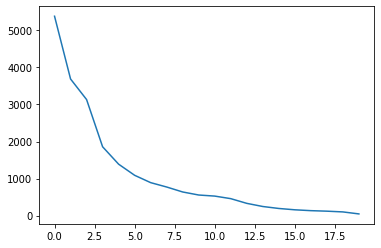

In [24]:
plt.plot(a)

In [42]:
E9X_train, E9X_test, E9Y_train, E9Y_test = train_test_split(E9 , labels_E9 ,test_size=0.2)

In [43]:
model9 = Sequential()
model9.add(Conv1D(32, 3, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(20, 1)))
model9.add(MaxPooling1D(2))
model9.add(BatchNormalization())
model9.add(Dropout(0.2))
model9.add(Conv1D(64, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model9.add(MaxPooling1D(2))
model9.add(BatchNormalization())
model9.add(Dropout(0.2))
model9.add(Conv1D(128, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model9.add(MaxPooling1D(2))
model9.add(BatchNormalization())
model9.add(Dropout(0.2))
model9.add(Flatten())
model9.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model9.add(Dropout(0.5))
model9.add(Dense(1, activation='sigmoid'))

In [44]:
model9.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [45]:
history9 = model9.fit(E9X_train, E9Y_train, batch_size=64, validation_data=(E9X_test, E9Y_test), epochs=20)

Train on 92341 samples, validate on 23086 samples
Epoch 1/20
92341/92341 [==============================] - 17s 179us/step - loss: 0.5671 - accuracy: 0.7692 - val_loss: 0.5336 - val_accuracy: 0.7805
Epoch 2/20
92341/92341 [==============================] - 15s 166us/step - loss: 0.5379 - accuracy: 0.7789 - val_loss: 0.5329 - val_accuracy: 0.7805
Epoch 3/20
92341/92341 [==============================] - 14s 151us/step - loss: 0.5335 - accuracy: 0.7798 - val_loss: 0.5291 - val_accuracy: 0.7805
Epoch 4/20
92341/92341 [==============================] - 14s 152us/step - loss: 0.5316 - accuracy: 0.7802 - val_loss: 0.5289 - val_accuracy: 0.7805
Epoch 5/20
92341/92341 [==============================] - 14s 156us/step - loss: 0.5312 - accuracy: 0.7803 - val_loss: 0.5266 - val_accuracy: 0.7805
Epoch 6/20
92341/92341 [==============================] - 14s 153us/step - loss: 0.5299 - accuracy: 0.7803 - val_loss: 0.5259 - val_accuracy: 0.7805
Epoch 7/20
92341/92341 [==============================] 

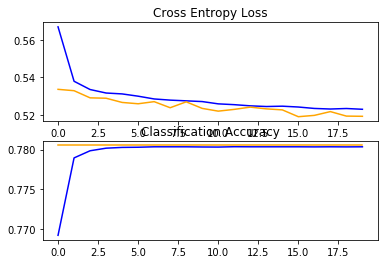

In [46]:
summarize_diagnostics(history9)

# E_tot

In [105]:
folder = 'prova_E/prova_E/E9/'
i = 0
for file in os.listdir(folder):
    i += 1
print(i)

115427


In [106]:
139137+189571+190128+190432+188824+189695+149425+141085+140086+115427

1633810

In [3]:
Etot = np.empty((1633810, 20, 1), dtype=cp.float64)
labels_Etot = np.zeros(1633810)
i = 0

folder = 'prova_E/prova_E/E0/'
for file in os.listdir(folder):
    if file.startswith('el'):
        labels_Etot[i] = 1
    array = np.load(folder + file)
    array = cp.reshape(array, (20,1))
    Etot[i] = array
    i += 1
    
folder = 'prova_E/prova_E/E1/'
for file in os.listdir(folder):
    if file.startswith('el'):
        labels_Etot[i] = 1
    array = np.load(folder + file)
    array = cp.reshape(array, (20,1))
    Etot[i] = array
    i += 1
    
folder = 'prova_E/prova_E/E2/'
for file in os.listdir(folder):
    if file.startswith('el'):
        labels_Etot[i] = 1
    array = np.load(folder + file)
    array = cp.reshape(array, (20,1))
    Etot[i] = array
    i += 1
    
folder = 'prova_E/prova_E/E3/'
for file in os.listdir(folder):
    if file.startswith('el'):
        labels_Etot[i] = 1
    array = np.load(folder + file)
    array = cp.reshape(array, (20,1))
    Etot[i] = array
    i += 1
    
folder = 'prova_E/prova_E/E4/'
for file in os.listdir(folder):
    if file.startswith('el'):
        labels_Etot[i] = 1
    array = np.load(folder + file)
    array = cp.reshape(array, (20,1))
    Etot[i] = array
    i += 1
    
folder = 'prova_E/prova_E/E5/'
for file in os.listdir(folder):
    if file.startswith('el'):
        labels_Etot[i] = 1
    array = np.load(folder + file)
    array = cp.reshape(array, (20,1))
    Etot[i] = array
    i += 1
    
folder = 'prova_E/prova_E/E6/'
for file in os.listdir(folder):
    if file.startswith('el'):
        labels_Etot[i] = 1
    array = np.load(folder + file)
    array = cp.reshape(array, (20,1))
    Etot[i] = array
    i += 1
    
folder = 'prova_E/prova_E/E7/'
for file in os.listdir(folder):
    if file.startswith('el'):
        labels_Etot[i] = 1
    array = np.load(folder + file)
    array = cp.reshape(array, (20,1))
    Etot[i] = array
    i += 1
    
folder = 'prova_E/prova_E/E8/'
for file in os.listdir(folder):
    if file.startswith('el'):
        labels_Etot[i] = 1
    array = np.load(folder + file)
    array = cp.reshape(array, (20,1))
    Etot[i] = array
    i += 1
    
folder = 'prova_E/prova_E/E9/'
for file in os.listdir(folder):
    if file.startswith('el'):
        labels_Etot[i] = 1
    array = np.load(folder + file)
    array = cp.reshape(array, (20,1))
    Etot[i] = array
    i += 1

In [4]:
Etot = Etot/Etot.max()

In [5]:
from sklearn.model_selection import train_test_split
EtotX_train, EtotX_test, EtotY_train, EtotY_test = train_test_split(Etot , labels_Etot ,test_size=0.2)

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D

model = Sequential()
model.add(Conv1D(32, 3, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(20, 1)))
model.add(MaxPooling1D(2))
model.add(Dropout(0.2))
model.add(Conv1D(64, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.2))
model.add(Conv1D(128, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [7]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [8]:
history = model.fit(EtotX_train, EtotY_train, batch_size=64, validation_data=(EtotX_test, EtotY_test), epochs=20)

Train on 1307048 samples, validate on 326762 samples
Epoch 1/20
1307048/1307048 [==============================] - 159s 122us/step - loss: 0.6658 - accuracy: 0.5788 - val_loss: 0.6615 - val_accuracy: 0.5834
Epoch 2/20
1307048/1307048 [==============================] - 147s 113us/step - loss: 0.6567 - accuracy: 0.5840 - val_loss: 0.6595 - val_accuracy: 0.5847
Epoch 3/20
1307048/1307048 [==============================] - 151s 116us/step - loss: 0.6534 - accuracy: 0.5923 - val_loss: 0.6538 - val_accuracy: 0.6159
Epoch 4/20
1307048/1307048 [==============================] - 155s 119us/step - loss: 0.6491 - accuracy: 0.6031 - val_loss: 0.6455 - val_accuracy: 0.6136
Epoch 5/20
1307048/1307048 [==============================] - 152s 117us/step - loss: 0.6464 - accuracy: 0.6082 - val_loss: 0.6437 - val_accuracy: 0.6143
Epoch 6/20
1307048/1307048 [==============================] - 156s 119us/step - loss: 0.6448 - accuracy: 0.6115 - val_loss: 0.6424 - val_accuracy: 0.6188
Epoch 7/20
1307048/1307

KeyboardInterrupt: 

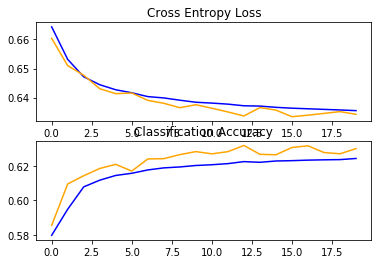

In [113]:
summarize_diagnostics(history)

In [101]:
E0 = np.empty((97744, 100, 1), dtype=cp.float64)
labels_E0 = np.zeros(97744)
folder = 'EnergySplit/E0/'
i = 0
j = 0
for file in os.listdir(folder):
    if file.startswith('el') and j < 48872:
        labels_E0[i] = 1
        array = np.load(folder + file)
        array = cp.reshape(array, (100,1))
        E0[i] = array
        i += 1
        j += 1
    elif file.startswith('pos'):
        array = np.load(folder + file)
        array = cp.reshape(array, (100,1))
        E0[i] = array
        i += 1

In [103]:
j = 0
for i in range(97744):
    if labels_E0[i] == 0:
        j +=1
print(j)

48872
